In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

First, load the data and take a look. Make sure the table looks good.

In [2]:
gc_df = pd.read_csv('CROG.gene.count.summary.csv')
gc_df.set_index('OG_ID', inplace=True)
gc_df.head(5)

Md_Gala  Md_GDDH  Malsi  Malsy  Pyrbe  Pyrpy_N  Md.HC.hapA  Md.HC.hapB  \
OG_ID                                                                           
OG1        211      231    208    213    221      228         206         209   
OG2        301      314    236    224    228      281         250         245   
OG3        201      253    217    201    270      272         217         240   
OG4        373      351    214    273    285      202         311         310   
OG5        159      192    161    122    184      162         159         169   

       Malba  Malfu.hapA  Malfu.hapB  Malpr  Pc.DA.hapA  Pc.DA.hapB  \
OG_ID                                                                 
OG1      224         221         222    188         239         238   
OG2      227         147         138    133         125         113   
OG3      208         232         236    246         218         198   
OG4      304         394         382     20         380         379   
OG5      145         187         180    160         190         198   

       Md.WA38.hapA  Md.WA38.hapB  Md.Anton.hapA  Md.Anton.hapB  
OG_ID                                                            
OG1             242           248            217            213  
OG2             270           336            258            261  
OG3             260           308            290            269  
OG4             111           328            322            299  
OG5             179           224            202            204

In [3]:
gc_df.shape

(9656, 18)

## Create clustermap

Next, remove rows with standard deviation of 0 (Cluster map can't handle STDEV=0)

In [5]:
gc_df_stdev = gc_df.assign(stdev=gc_df.std(axis=1))
gc_df_stdev_0_removed=gc_df_stdev[gc_df_stdev['stdev']>0]
gc_df_stdev_0_removed.shape

(9200, 19)

Now remove the stdev column

In [6]:
gc_df2 = gc_df_stdev_0_removed.drop(columns='stdev')
gc_df2.head(5)

Md_Gala  Md_GDDH  Malsi  Malsy  Pyrbe  Pyrpy_N  Md.HC.hapA  Md.HC.hapB  \
OG_ID                                                                           
OG1        211      231    208    213    221      228         206         209   
OG2        301      314    236    224    228      281         250         245   
OG3        201      253    217    201    270      272         217         240   
OG4        373      351    214    273    285      202         311         310   
OG5        159      192    161    122    184      162         159         169   

       Malba  Malfu.hapA  Malfu.hapB  Malpr  Pc.DA.hapA  Pc.DA.hapB  \
OG_ID                                                                 
OG1      224         221         222    188         239         238   
OG2      227         147         138    133         125         113   
OG3      208         232         236    246         218         198   
OG4      304         394         382     20         380         379   
OG5      145         187         180    160         190         198   

       Md.WA38.hapA  Md.WA38.hapB  Md.Anton.hapA  Md.Anton.hapB  
OG_ID                                                            
OG1             242           248            217            213  
OG2             270           336            258            261  
OG3             260           308            290            269  
OG4             111           328            322            299  
OG5             179           224            202            204

In [7]:
gc_df2.shape

(9200, 18)

/Users/huitingzhang/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


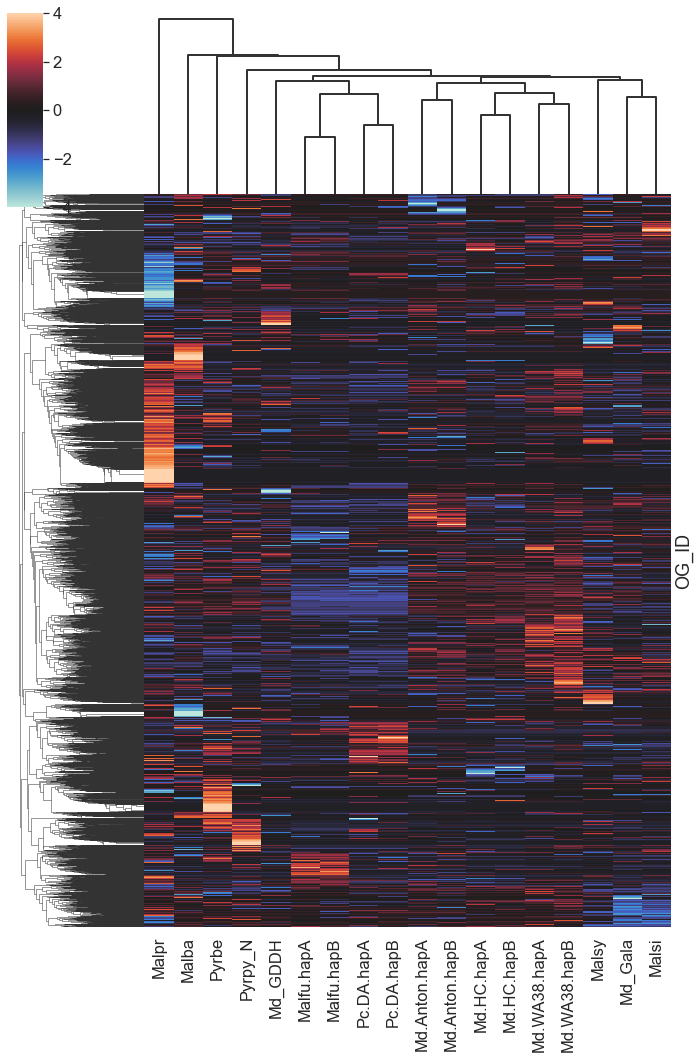

In [17]:
sns.set(font_scale=1.5)
CROG_plot = sns.clustermap(gc_df2, z_score=0, yticklabels=False, cmap='icefire', figsize=(10,15))
# The following increase dandrogram linewidth
for a in CROG_plot.ax_col_dendrogram.collections:
    a.set_linewidth(2)
CROG_plot.savefig("maleae_clustermap_zscore_font1.5_10x15.pdf")

Malpr seems pretty noisy, let's remove it.

In [9]:
gc_df_remove_Malpr = gc_df.drop(columns='Malpr')
gc_df_remove_Malpr.head(5)

Md_Gala  Md_GDDH  Malsi  Malsy  Pyrbe  Pyrpy_N  Md.HC.hapA  Md.HC.hapB  \
OG_ID                                                                           
OG1        211      231    208    213    221      228         206         209   
OG2        301      314    236    224    228      281         250         245   
OG3        201      253    217    201    270      272         217         240   
OG4        373      351    214    273    285      202         311         310   
OG5        159      192    161    122    184      162         159         169   

       Malba  Malfu.hapA  Malfu.hapB  Pc.DA.hapA  Pc.DA.hapB  Md.WA38.hapA  \
OG_ID                                                                        
OG1      224         221         222         239         238           242   
OG2      227         147         138         125         113           270   
OG3      208         232         236         218         198           260   
OG4      304         394         382         380         379           111   
OG5      145         187         180         190         198           179   

       Md.WA38.hapB  Md.Anton.hapA  Md.Anton.hapB  
OG_ID                                              
OG1             248            217            213  
OG2             336            258            261  
OG3             308            290            269  
OG4             328            322            299  
OG5             224            202            204

In [10]:
gc_df_remove_Malpr.shape

(9656, 17)

In [12]:
gc_df_stdev2 = gc_df_remove_Malpr.assign(stdev=gc_df_remove_Malpr.std(axis=1))
gc_df_stdev_0_removed2 = gc_df_stdev2[gc_df_stdev2['stdev']>0]
gc_df_stdev_0_removed2.shape

(8946, 18)

In [13]:
gc_df_stdev_0_removed2.head(5)

Md_Gala  Md_GDDH  Malsi  Malsy  Pyrbe  Pyrpy_N  Md.HC.hapA  Md.HC.hapB  \
OG_ID                                                                           
OG1        211      231    208    213    221      228         206         209   
OG2        301      314    236    224    228      281         250         245   
OG3        201      253    217    201    270      272         217         240   
OG4        373      351    214    273    285      202         311         310   
OG5        159      192    161    122    184      162         159         169   

       Malba  Malfu.hapA  Malfu.hapB  Pc.DA.hapA  Pc.DA.hapB  Md.WA38.hapA  \
OG_ID                                                                        
OG1      224         221         222         239         238           242   
OG2      227         147         138         125         113           270   
OG3      208         232         236         218         198           260   
OG4      304         394         382         380         379           111   
OG5      145         187         180         190         198           179   

       Md.WA38.hapB  Md.Anton.hapA  Md.Anton.hapB      stdev  
OG_ID                                                         
OG1             248            217            213  12.884099  
OG2             336            258            261  66.116430  
OG3             308            290            269  33.451567  
OG4             328            322            299  75.205112  
OG5             224            202            204  24.746509

In [14]:
gc_df3 = gc_df_stdev_0_removed2.drop(columns='stdev')
gc_df3.head(5)

Md_Gala  Md_GDDH  Malsi  Malsy  Pyrbe  Pyrpy_N  Md.HC.hapA  Md.HC.hapB  \
OG_ID                                                                           
OG1        211      231    208    213    221      228         206         209   
OG2        301      314    236    224    228      281         250         245   
OG3        201      253    217    201    270      272         217         240   
OG4        373      351    214    273    285      202         311         310   
OG5        159      192    161    122    184      162         159         169   

       Malba  Malfu.hapA  Malfu.hapB  Pc.DA.hapA  Pc.DA.hapB  Md.WA38.hapA  \
OG_ID                                                                        
OG1      224         221         222         239         238           242   
OG2      227         147         138         125         113           270   
OG3      208         232         236         218         198           260   
OG4      304         394         382         380         379           111   
OG5      145         187         180         190         198           179   

       Md.WA38.hapB  Md.Anton.hapA  Md.Anton.hapB  
OG_ID                                              
OG1             248            217            213  
OG2             336            258            261  
OG3             308            290            269  
OG4             328            322            299  
OG5             224            202            204

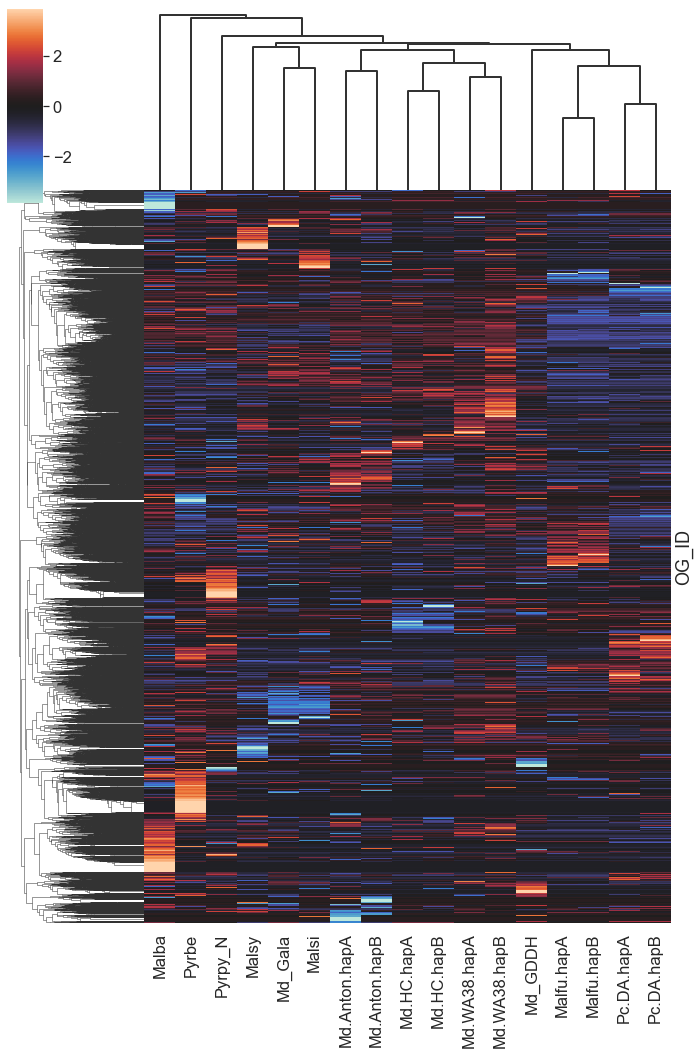

In [16]:
sns.set(font_scale=1.5)
CROG_plot2 = sns.clustermap(gc_df3, z_score=0, yticklabels=False, cmap='icefire', figsize=(10,15))
# The following increase dandrogram linewidth
for a in CROG_plot2.ax_col_dendrogram.collections:
    a.set_linewidth(2)
CROG_plot2.savefig("maleae_clustermap_zscore_font1.5_10x15_remove_Malpr.pdf")

How about a Malus only plot?

In [19]:
gc_df_Malus = gc_df.drop(columns=['Pyrbe', 'Pyrpy_N', 'Pc.DA.hapA', 'Pc.DA.hapB'])
gc_df_Malus.head(5)

Md_Gala  Md_GDDH  Malsi  Malsy  Md.HC.hapA  Md.HC.hapB  Malba  \
OG_ID                                                                  
OG1        211      231    208    213         206         209    224   
OG2        301      314    236    224         250         245    227   
OG3        201      253    217    201         217         240    208   
OG4        373      351    214    273         311         310    304   
OG5        159      192    161    122         159         169    145   

       Malfu.hapA  Malfu.hapB  Malpr  Md.WA38.hapA  Md.WA38.hapB  \
OG_ID                                                              
OG1           221         222    188           242           248   
OG2           147         138    133           270           336   
OG3           232         236    246           260           308   
OG4           394         382     20           111           328   
OG5           187         180    160           179           224   

       Md.Anton.hapA  Md.Anton.hapB  
OG_ID                                
OG1              217            213  
OG2              258            261  
OG3              290            269  
OG4              322            299  
OG5              202            204

In [20]:
gc_df_Malus.shape

(9656, 14)

In [26]:
gc_df_stdev_malus = gc_df_Malus.assign(stdev=gc_df_Malus.std(axis=1))
gc_df_stdev_0_removed_malus = gc_df_stdev_malus[gc_df_stdev_malus['stdev']>0]
gc_df_stdev_0_removed_malus.shape

(8929, 15)

In [27]:
gc_df_stdev_0_removed_malus.head(5)

Md_Gala  Md_GDDH  Malsi  Malsy  Md.HC.hapA  Md.HC.hapB  Malba  \
OG_ID                                                                  
OG1        211      231    208    213         206         209    224   
OG2        301      314    236    224         250         245    227   
OG3        201      253    217    201         217         240    208   
OG4        373      351    214    273         311         310    304   
OG5        159      192    161    122         159         169    145   

       Malfu.hapA  Malfu.hapB  Malpr  Md.WA38.hapA  Md.WA38.hapB  \
OG_ID                                                              
OG1           221         222    188           242           248   
OG2           147         138    133           270           336   
OG3           232         236    246           260           308   
OG4           394         382     20           111           328   
OG5           187         180    160           179           224   

       Md.Anton.hapA  Md.Anton.hapB       stdev  
OG_ID                                            
OG1              217            213   15.269196  
OG2              258            261   62.706538  
OG3              290            269   32.523195  
OG4              322            299  105.302390  
OG5              202            204   26.485845

In [28]:
gc_df4 = gc_df_stdev_0_removed_malus.drop(columns='stdev')
gc_df4.head(5)

Md_Gala  Md_GDDH  Malsi  Malsy  Md.HC.hapA  Md.HC.hapB  Malba  \
OG_ID                                                                  
OG1        211      231    208    213         206         209    224   
OG2        301      314    236    224         250         245    227   
OG3        201      253    217    201         217         240    208   
OG4        373      351    214    273         311         310    304   
OG5        159      192    161    122         159         169    145   

       Malfu.hapA  Malfu.hapB  Malpr  Md.WA38.hapA  Md.WA38.hapB  \
OG_ID                                                              
OG1           221         222    188           242           248   
OG2           147         138    133           270           336   
OG3           232         236    246           260           308   
OG4           394         382     20           111           328   
OG5           187         180    160           179           224   

       Md.Anton.hapA  Md.Anton.hapB  
OG_ID                                
OG1              217            213  
OG2              258            261  
OG3              290            269  
OG4              322            299  
OG5              202            204

In [29]:
gc_df4.shape

(8929, 14)

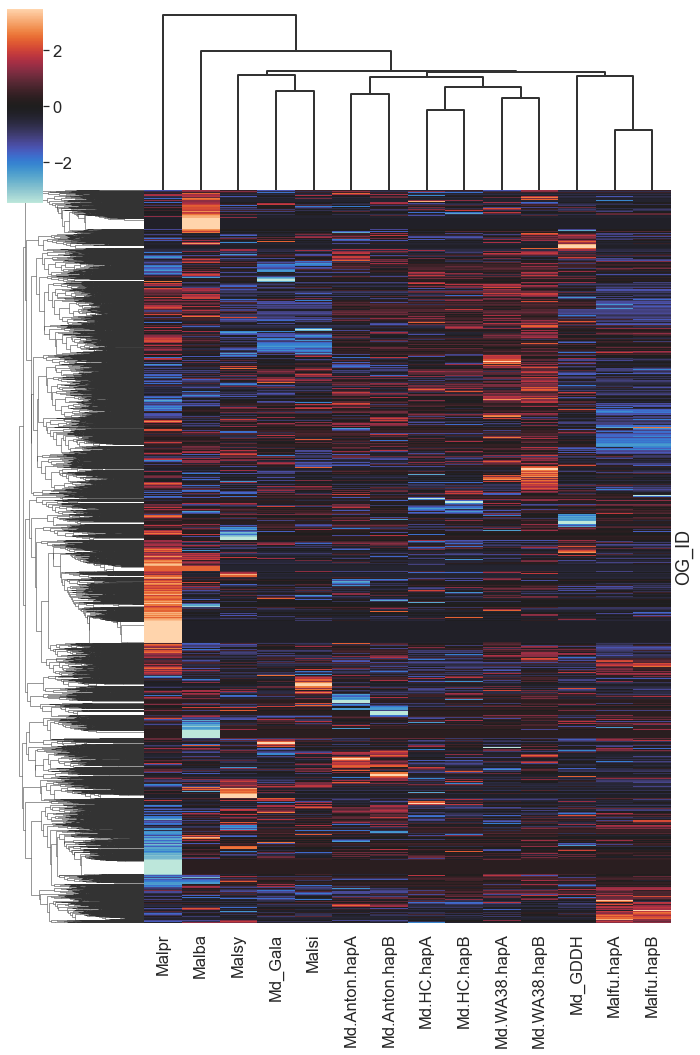

In [31]:
sns.set(font_scale=1.5)
CROG_plot3 = sns.clustermap(gc_df4, z_score=0, yticklabels=False, cmap='icefire', figsize=(10,15))
# The following increase dandrogram linewidth
for a in CROG_plot3.ax_col_dendrogram.collections:
    a.set_linewidth(2)
CROG_plot3.savefig("maleae_clustermap_zscore_font1.5_10x15_Malus_only.pdf")

## DEP-Now boxplot of zscore

In [65]:
import scipy.stats as stats

*The zscore calculation doesn't look right*

In [60]:
gc_df2_zscore = stats.zscore(gc_df2)
gc_df2_zscore.head(5)

Md_Gala    Md_GDDH      Malsi      Malsy      Pyrbe    Pyrpy_N  \
OG_ID                                                                     
OG1    18.403151  22.473467  22.397210  20.778829   8.638563  23.193267   
OG2    26.412283  30.693176  25.473802  21.873353   8.918562  28.689147   
OG3    17.513247  24.652185  23.386115  19.584802  10.598554  27.755884   
OG4    32.819590  34.357383  23.056480  26.748962  11.198551  20.497175   
OG5    13.775652  18.611194  17.232931  11.724126   7.158570  16.349341   

       Md.HC.hapA  Md.HC.hapB      Malba  Malfu.hapA  Malfu.hapB      Malpr  \
OG_ID                                                                         
OG1     13.755531   20.342725  25.753511   23.856251   24.234550  26.995391   
OG2     16.757188   23.919497  26.104987   15.724487   14.902036  18.923537   
OG3     14.505946   23.422723  23.878970   25.065027   25.789969  35.507528   
OG4     20.918575   30.377557  35.126215   42.866997   42.010766   2.339547   
OG5     10.549217   16.368534  16.497966   20.120036   19.568293  22.886084   

       Pc.DA.hapA  Pc.DA.hapB  Md.WA38.hapA  Md.WA38.hapB  
OG_ID                                                      
OG1     24.026462   24.559472     25.342162     20.319060  
OG2     12.374868   11.444406     28.329587     27.676735  
OG3     21.880116   20.362651     27.262650     25.335657  
OG4     38.437644   39.353267     11.365283     27.007856  
OG5     19.018321   20.362651     18.620457     18.312422

<AxesSubplot:>

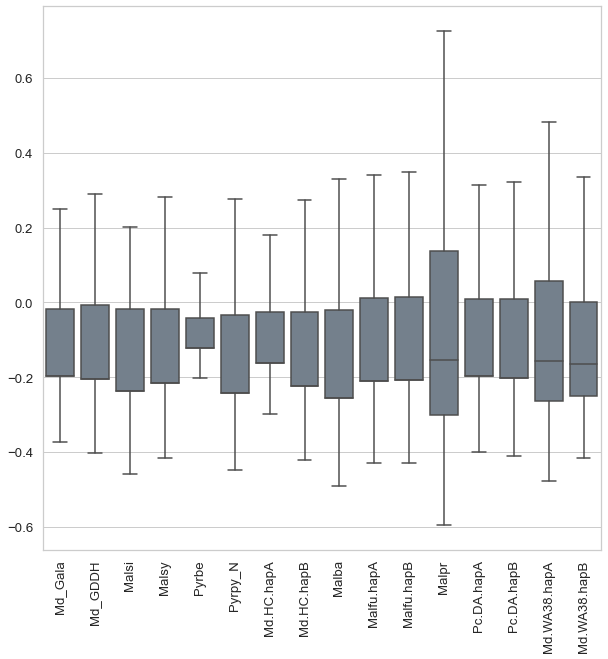

In [62]:
sns.set(rc={'figure.figsize':(10,10)}, font_scale=1.2, style='whitegrid')
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
sns.boxplot(data=gc_df2_zscore, showfliers=False, color="slategray")
#plt.savefig("maleae_remove_three_zscore_monocolor_reorder.pdf")

In [63]:
gc_df3_zscore = stats.zscore(gc_df3)
gc_df3_zscore.head(5)

Md_Gala    Md_GDDH      Malsi      Malsy      Pyrbe    Pyrpy_N  \
OG_ID                                                                     
OG1    18.105077  22.112935  22.043577  20.446373   8.492948  22.827629   
OG2    25.987637  30.203565  25.072801  21.523807   8.768368  28.238977   
OG3    17.229237  24.257439  23.017256  19.270991  10.420892  27.320069   
OG4    32.293684  33.810232  22.692696  26.323284  11.011079  20.173006   
OG5    13.550709  18.311313  16.958808  11.533058   7.037153  16.088970   

       Md.HC.hapA  Md.HC.hapB      Malba  Malfu.hapA  Malfu.hapB  Pc.DA.hapA  \
OG_ID                                                                          
OG1     13.528309   20.018069  25.352519   23.475468   23.847693   23.640536   
OG2     16.481674   23.539209  25.698652   15.470825   14.661150   12.172527   
OG3     14.266650   23.050161  23.506477   24.665348   25.378784   21.528008   
OG4     20.576112   29.896822  34.582730   42.189026   41.345870   37.824652   
OG5     10.373578   16.105691  16.237685   19.797659   19.254422   18.711304   

       Pc.DA.hapB  Md.WA38.hapA  Md.WA38.hapB  
OG_ID                                          
OG1     24.166127     24.948257     19.997388  
OG2     11.257078     27.890387     27.241838  
OG3     20.035231     26.839626     24.936786  
OG4     38.727534     11.183290     26.583252  
OG5     20.035231     18.328463     18.021629

<AxesSubplot:>

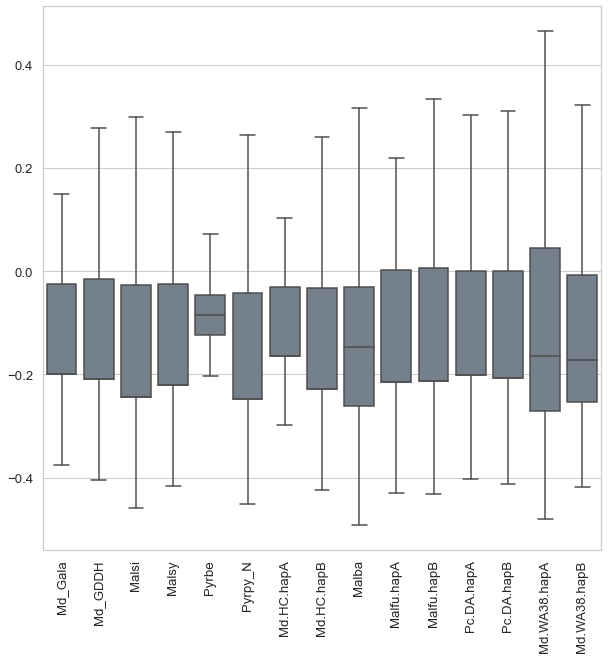

In [64]:
plt.xticks(rotation = 90)
sns.boxplot(data=gc_df3_zscore, showfliers=False, color="slategray")
#plt.savefig("maleae_remove_three_zscore_monocolor_reorder.pdf")

## Boxplt from zscore calculated in excel

In [32]:
manual_zscore_df = pd.read_csv('CROG.gene.count.zscore.csv')
manual_zscore_df.set_index('OG_ID', inplace=True)
manual_zscore_df.head(5)

Malpr     Malba     Pyrbe   Pyrpy_N   Md_GDDH  Malfu.hapA  \
OG_ID                                                                  
OG1615 -0.235702 -0.235702 -0.235702  4.006938 -0.235702   -0.235702   
OG1668  4.006938 -0.235702 -0.235702 -0.235702 -0.235702   -0.235702   
OG1700  4.006938 -0.235702 -0.235702 -0.235702 -0.235702   -0.235702   
OG1941 -0.235702 -0.235702 -0.235702 -0.235702 -0.235702   -0.235702   
OG1968 -0.235702 -0.235702 -0.235702 -0.235702 -0.235702   -0.235702   

        Malfu.hapB  Pc.DA.hapA  Pc.DA.hapB  Md.Anton.hapA  Md.Anton.hapB  \
OG_ID                                                                      
OG1615   -0.235702   -0.235702   -0.235702      -0.235702      -0.235702   
OG1668   -0.235702   -0.235702   -0.235702      -0.235702      -0.235702   
OG1700   -0.235702   -0.235702   -0.235702      -0.235702      -0.235702   
OG1941   -0.235702   -0.235702   -0.235702      -0.235702      -0.235702   
OG1968   -0.235702   -0.235702   -0.235702      -0.235702       4.006938   

        Md.HC.hapA  Md.HC.hapB  Md.WA38.hapA  Md.WA38.hapB     Malsi  \
OG_ID                                                                  
OG1615   -0.235702   -0.235702     -0.235702     -0.235702 -0.235702   
OG1668   -0.235702   -0.235702     -0.235702     -0.235702 -0.235702   
OG1700   -0.235702   -0.235702     -0.235702     -0.235702 -0.235702   
OG1941   -0.235702   -0.235702     -0.235702      4.006938 -0.235702   
OG1968   -0.235702   -0.235702     -0.235702     -0.235702 -0.235702   

         Md_Gala     Malsy  
OG_ID                       
OG1615 -0.235702 -0.235702  
OG1668 -0.235702 -0.235702  
OG1700 -0.235702 -0.235702  
OG1941 -0.235702 -0.235702  
OG1968 -0.235702 -0.235702

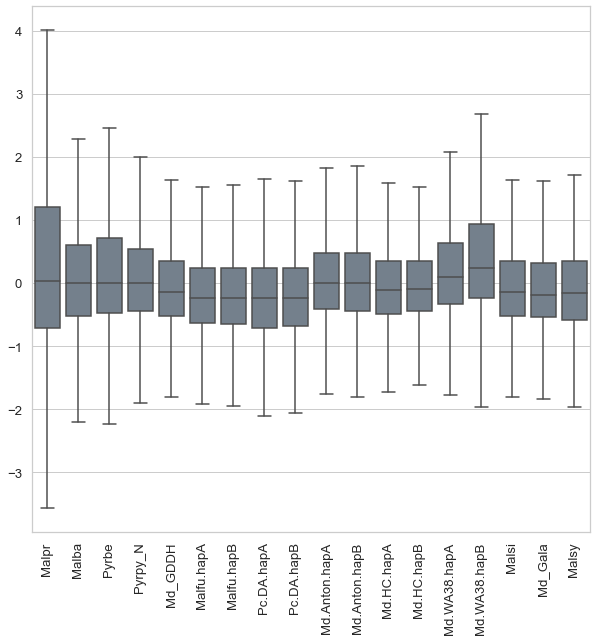

In [33]:
sns.set(rc={'figure.figsize':(10,10), 'figure.subplot.bottom':0.15}, font_scale=1.2, style='whitegrid')
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
sns.boxplot(data=manual_zscore_df, showfliers=False, color="slategray")
plt.savefig("zscore_monocolor_reorder.pdf")

How about a Malus only boxplot

In [34]:
malus_zscore_df = pd.read_csv('CROG.gene.count.zscore.malus.csv')
malus_zscore_df.set_index('OG_ID', inplace=True)
malus_zscore_df.head(5)

Malpr     Malba     Malsy   Md_Gala     Malsi  Md.Anton.hapA  \
OG_ID                                                                     
OG1700  3.474396 -0.267261 -0.267261 -0.267261 -0.267261      -0.267261   
OG2353 -0.267261 -0.267261 -0.267261  3.474396 -0.267261      -0.267261   
OG2763  3.474396 -0.267261 -0.267261 -0.267261 -0.267261      -0.267261   
OG2770 -0.267261 -0.267261 -0.267261  3.474396 -0.267261      -0.267261   
OG2966 -0.267261 -0.267261 -0.267261 -0.267261  3.474396      -0.267261   

        Md.Anton.hapB  Md.HC.hapA  Md.HC.hapB  Md.WA38.hapA  Md.WA38.hapB  \
OG_ID                                                                       
OG1700      -0.267261   -0.267261   -0.267261     -0.267261     -0.267261   
OG2353      -0.267261   -0.267261   -0.267261     -0.267261     -0.267261   
OG2763      -0.267261   -0.267261   -0.267261     -0.267261     -0.267261   
OG2770      -0.267261   -0.267261   -0.267261     -0.267261     -0.267261   
OG2966      -0.267261   -0.267261   -0.267261     -0.267261     -0.267261   

         Md_GDDH  Malfu.hapA  Malfu.hapB  
OG_ID                                     
OG1700 -0.267261   -0.267261   -0.267261  
OG2353 -0.267261   -0.267261   -0.267261  
OG2763 -0.267261   -0.267261   -0.267261  
OG2770 -0.267261   -0.267261   -0.267261  
OG2966 -0.267261   -0.267261   -0.267261

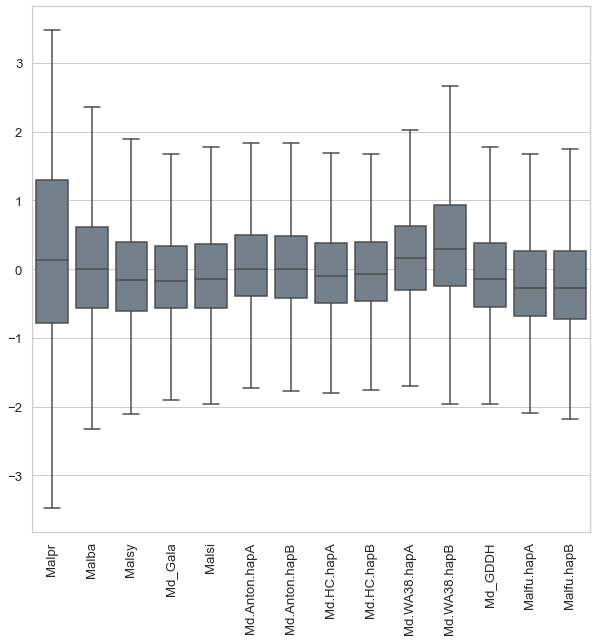

In [35]:
sns.set(rc={'figure.figsize':(10,10), 'figure.subplot.bottom':0.15}, font_scale=1.2, style='whitegrid')
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
sns.boxplot(data=malus_zscore_df, showfliers=False, color="slategray")
plt.savefig("zscore_malus_monocolor_reorder.pdf")